In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('out.csv')

In [3]:
df.head()

Unnamed: 0        Date                                            Address  \
0           0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1           1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2           2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3           3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4           4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  Tavg  DewPoint  PrecipTotal  AvgSpeed  \
0             1           0    74        58          0.0       6.5   
1             1           0    74        58          0.0       6.5   
2             1           0    74        58          0.0       6.5   
3             1           0    74        58          0.0       6.5   
4             4           0    74        58          0.0       6.5   

   length_of_day  
0          896.0  
1          896.0  
2          896.0  
3          896.0  
4          896.0

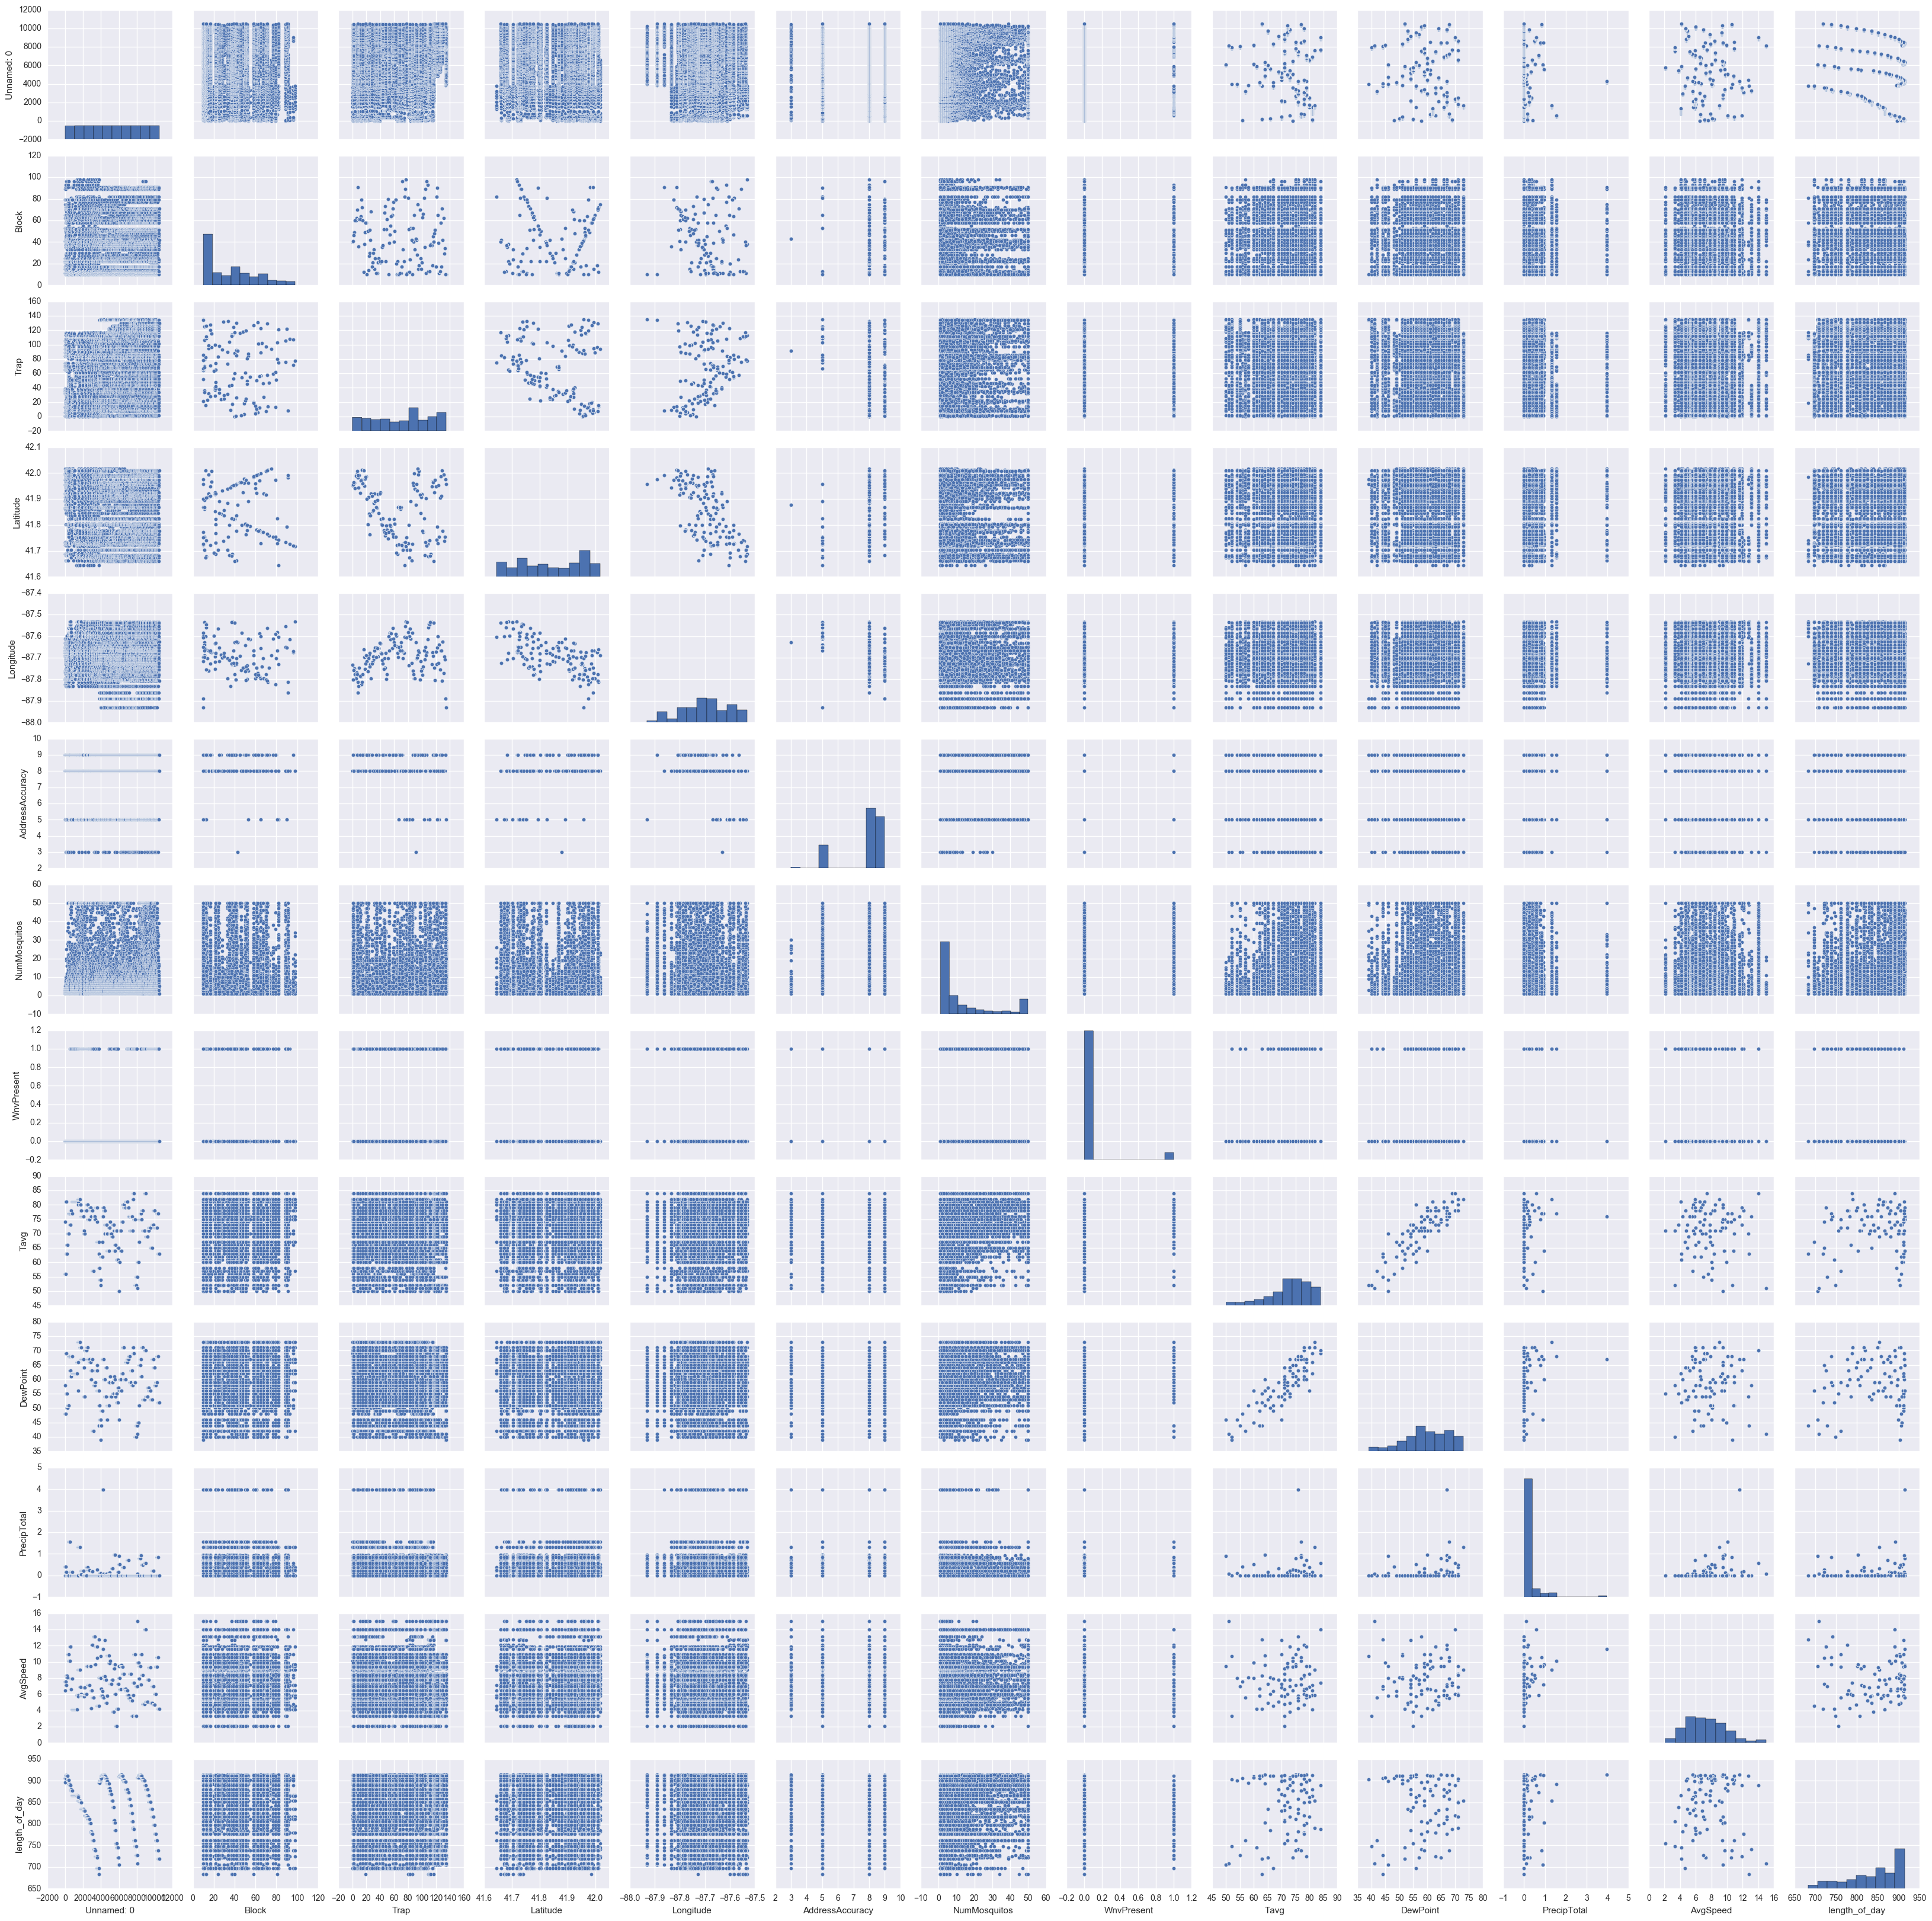

In [51]:
sns.pairplot(df)

In [27]:
X = df.drop("WnvPresent", axis=1)
y = df.WnvPresent

In [28]:
X.head()
X = X.drop(['Unnamed: 0', 'Date', 'Address', 'Block', 'Street', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy'], axis=1)

In [29]:
X.head()

Species  Trap  NumMosquitos  Tavg  DewPoint  PrecipTotal  \
0  CULEX PIPIENS/RESTUANS     1             1    74        58          0.0   
1          CULEX RESTUANS     1             1    74        58          0.0   
2          CULEX RESTUANS     6             1    74        58          0.0   
3  CULEX PIPIENS/RESTUANS    13             1    74        58          0.0   
4          CULEX RESTUANS    13             4    74        58          0.0   

   AvgSpeed  length_of_day  
0       6.5          896.0  
1       6.5          896.0  
2       6.5          896.0  
3       6.5          896.0  
4       6.5          896.0

In [30]:
X.Species = X.Species.astype('category')
X.Species = X.Species.cat.codes

In [31]:
X.dtypes

Species             int8
Trap               int16
NumMosquitos       int64
Tavg               int64
DewPoint           int64
PrecipTotal      float64
AvgSpeed         float64
length_of_day    float64
dtype: object

In [32]:
X.Trap = X.Trap.astype('category')
X.Trap = X.Trap.cat.codes

In [33]:
X.dtypes

Species             int8
Trap               int16
NumMosquitos       int64
Tavg               int64
DewPoint           int64
PrecipTotal      float64
AvgSpeed         float64
length_of_day    float64
dtype: object

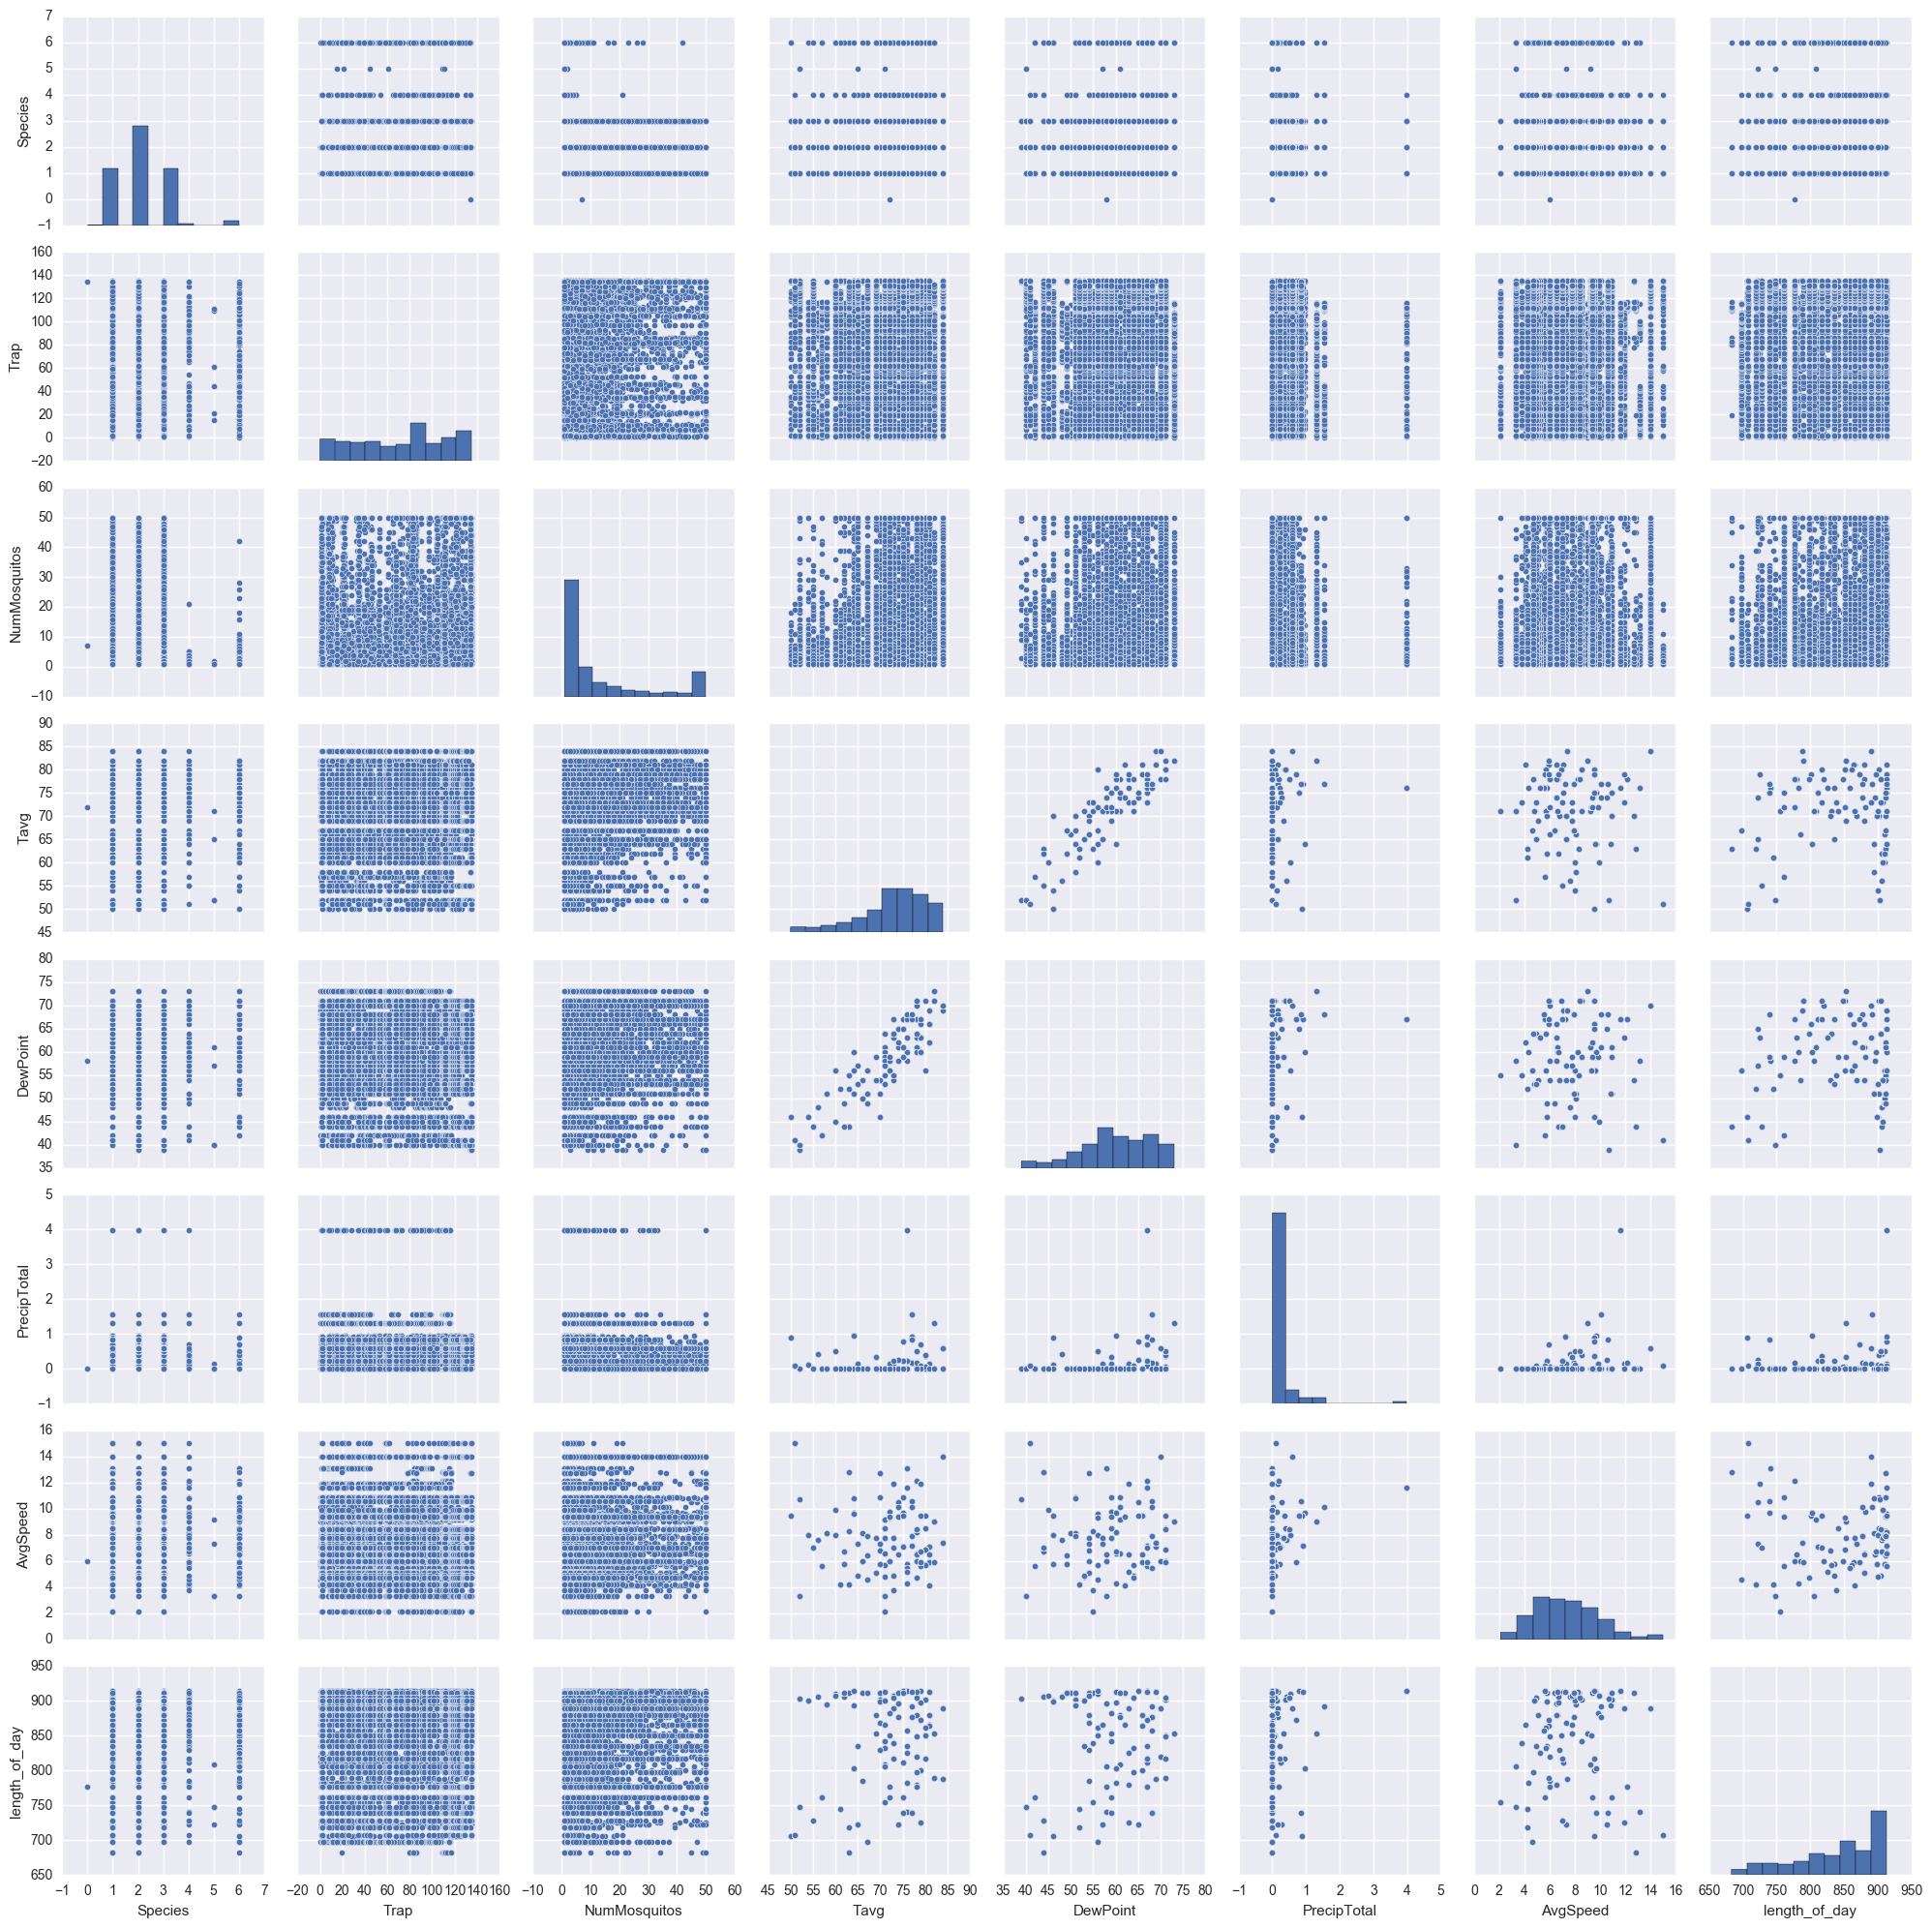

In [34]:
sns.pairplot(X)

In [35]:
X.head()

Species  Trap  NumMosquitos  Tavg  DewPoint  PrecipTotal  AvgSpeed  \
0        2     1             1    74        58          0.0       6.5   
1        3     1             1    74        58          0.0       6.5   
2        3     6             1    74        58          0.0       6.5   
3        2    13             1    74        58          0.0       6.5   
4        3    13             4    74        58          0.0       6.5   

   length_of_day  
0          896.0  
1          896.0  
2          896.0  
3          896.0  
4          896.0

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics

In [37]:
X = StandardScaler().fit_transform(X)

In [38]:
X[0:10]

array([[-0.11316062, -1.75147076, -0.73473484,  0.19532367, -0.2260027 ,
        -0.382231  , -0.36560473,  0.88402304],
       [ 0.95117728, -1.75147076, -0.73473484,  0.19532367, -0.2260027 ,
        -0.382231  , -0.36560473,  0.88402304],
       [ 0.95117728, -1.62794792, -0.73473484,  0.19532367, -0.2260027 ,
        -0.382231  , -0.36560473,  0.88402304],
       [-0.11316062, -1.45501593, -0.73473484,  0.19532367, -0.2260027 ,
        -0.382231  , -0.36560473,  0.88402304],
       [ 0.95117728, -1.45501593, -0.54878114,  0.19532367, -0.2260027 ,
        -0.382231  , -0.36560473,  0.88402304],
       [ 0.95117728, -0.9856291 , -0.67275027,  0.19532367, -0.2260027 ,
        -0.382231  , -0.36560473,  0.88402304],
       [ 0.95117728, -0.96092453, -0.73473484,  0.19532367, -0.2260027 ,
        -0.382231  , -0.36560473,  0.88402304],
       [-0.11316062, -0.91151539, -0.73473484,  0.19532367, -0.2260027 ,
        -0.382231  , -0.36560473,  0.88402304],
       [ 0.95117728, -0.91151539

In [77]:
dbscn = DBSCAN(eps = 3, min_samples = 10).fit(X)  

In [78]:
labels = dbscn.labels_  
print(labels)

[0 0 0 ..., 0 0 0]


In [79]:
core_samples = np.zeros_like(labels, dtype = bool)  
core_samples[dbscn.core_sample_indices_] = True 
print(core_samples)

[ True  True  True ...,  True  True  True]


In [80]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


In [81]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Homogeneity: 0.002
Completeness: 0.009
V-measure: 0.004
Silhouette Coefficient: 0.585


In [87]:
len(X)

10506

In [90]:
df_x = pd.DataFrame(X)

In [89]:
len(y)

10506

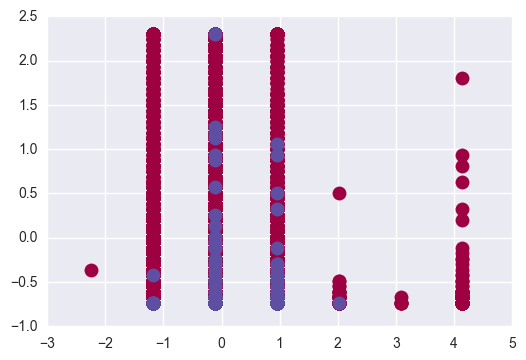

In [83]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    n = X[class_member_mask & core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    n = X[class_member_mask & ~core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 5)

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 66, test_size = 0.3)

In [117]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [118]:
model = knn.fit(X_train, y_train)

In [119]:
y_pred = model.predict(X_test)

In [120]:
metrics.accuracy_score(y_test, y_pred)

0.95970812182741116

In [121]:
names = ["present", "not present", "predicted present", "predicted not present"]

In [148]:
def evaluate_model(model, X, y, names):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=7)
    model = model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print model.score(X_test, Y_test)
    Y_pp = pd.DataFrame(model.predict_proba(X_test), columns=['class_0_pp','class_1_pp'])
    Y_pp['pred_class_thresh10'] = [1 if x >= 0.1 else 0 for x in Y_pp.class_1_pp.values]
    conmat = np.array(confusion_matrix(Y_test, Y_pp.pred_class_thresh10, labels=[1,0]))
    confusion = pd.DataFrame(conmat, index=[names[0:2]],
                         columns=[names[2:]]) 
    print(Y_pp.iloc[0:10])
    print confusion
    print(classification_report(Y_test, Y_pp.pred_class_thresh10))
    return "cross val mean score is", cross_val_score(model, X_train, Y_train, cv=5).mean()
    


evaluate_model(knn, X, y, names)

0.940294202481
   class_0_pp  class_1_pp  pred_class_thresh10
0         1.0         0.0                    0
1         1.0         0.0                    0
2         1.0         0.0                    0
3         1.0         0.0                    0
4         1.0         0.0                    0
5         1.0         0.0                    0
6         1.0         0.0                    0
7         1.0         0.0                    0
8         1.0         0.0                    0
9         1.0         0.0                    0
             predicted present  predicted not present
present                     65                    117
not present                247                   3038
             precision    recall  f1-score   support

          0       0.96      0.92      0.94      3285
          1       0.21      0.36      0.26       182

avg / total       0.92      0.90      0.91      3467



('cross val mean score is', 0.94217932254312875)

In [149]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, max_features='sqrt')


In [150]:
evaluate_model(rf, X, y, names)

0.937698298241
   class_0_pp  class_1_pp  pred_class_thresh10
0         0.7         0.3                    1
1         1.0         0.0                    0
2         1.0         0.0                    0
3         1.0         0.0                    0
4         1.0         0.0                    0
5         1.0         0.0                    0
6         1.0         0.0                    0
7         1.0         0.0                    0
8         1.0         0.0                    0
9         1.0         0.0                    0
             predicted present  predicted not present
present                    113                     69
not present                573                   2712
             precision    recall  f1-score   support

          0       0.98      0.83      0.89      3285
          1       0.16      0.62      0.26       182

avg / total       0.93      0.81      0.86      3467



('cross val mean score is', 0.94061601489306723)

In [ ]:
#gradient boosting


## classifiers that don't work

In [133]:
from sklearn.linear_model import LogisticRegression

#using support vector machine to classify. Have set the kernel to poly as polynomial kernels are better for natural language processing
#have set degree to 2 to prevent overfitting

lr = LogisticRegression()

In [134]:
evaluate_model(lr, X, y, names)

0.947505047592
             predicted present  predicted not present
present                      0                    182
not present                  0                   3285
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3285
          1       0.00      0.00      0.00       182

avg / total       0.90      0.95      0.92      3467



('cross val mean score is', 0.94757785746591716)

In [135]:
evaluate_model(svc, X, y, names)

0.947505047592
             predicted present  predicted not present
present                      0                    182
not present                  0                   3285
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3285
          1       0.00      0.00      0.00       182

avg / total       0.90      0.95      0.92      3467



('cross val mean score is', 0.94757785746591716)